# Data pre-processing

In [1]:
#Import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm

In [2]:
#Import Dataset
df = pd.read_excel("D:\Full_Data.xlsx")

In [3]:
#Check the data
df.head()

,AGE,DISTRICT,GENDER,MARITAL_STATUS,EDUCATION,GRAD_COUSE,MODE_INCOME,INCOME_TYPE,WORK_STATUS,STU_NON,...,PEER_SCORE,PERSONAL_INVESTMENT_SCORE,INV_GUIDE_EXPERTS,EMERG_FUND,GEN_PER_FIN_SCORE,SAV_SCORE,INSUR_SCORE,INV_SCORE,TOTAL_SCORE,PERCENT_SCORE
0,31,NMP,F,Married,Bachelors,BMS,Business profits,ACTIVE,Entrepreneur,NSTU,...,11,5,0,1,3,6,1,2,12,0.48
1,49,TK,F,Married,Post Graduate,BSc,Job Salary (Earned Income),ACTIVE,Full-time,NSTU,...,0,5,1,0,2,6,2,3,13,0.52
2,28,NMP,F,Single,Undergraduate,B.E,"Job Salary (Earned Income), Business profits, ...",ACTIVE+PORTFOLIO,Full-time,NSTU,...,11,4,1,1,4,7,4,3,18,0.72
3,19,MC,F,Single,Undergraduate,BSc,Pocket Money,PASSIVE,Student - Non working,STU,...,6,4,0,0,5,8,2,2,17,0.68
4,20,MC,F,Single,Bachelors,NaN,No source of income,NaN,Student - Non working,STU,...,17,5,0,0,2,3,2,1,8,0.32


In [4]:
# Dimension of the dataset
df.shape

(208, 25)

In [5]:
#Check for number of null values
df.isnull().sum()
# The data contains no unnecessary NaN values. We are good to go.

AGE                            0
DISTRICT                       0
GENDER                         0
MARITAL_STATUS                 0
EDUCATION                      0
GRAD_COUSE                    53
MODE_INCOME                    0
INCOME_TYPE                   24
WORK_STATUS                    0
STU_NON                        0
STU_INC                       88
WORKING_SECTOR               122
WORK_PROF_SALARY             122
GUIDANCE                       0
FAMILY_SCORE                   0
PEER_SCORE                     0
PERSONAL_INVESTMENT_SCORE      0
INV_GUIDE_EXPERTS              0
EMERG_FUND                     0
GEN_PER_FIN_SCORE              0
SAV_SCORE                      0
INSUR_SCORE                    0
INV_SCORE                      0
TOTAL_SCORE                    0
PERCENT_SCORE                  0
dtype: int64

In [6]:
#Overall Summary Statistics
df.describe()

,AGE,GUIDANCE,FAMILY_SCORE,PEER_SCORE,PERSONAL_INVESTMENT_SCORE,INV_GUIDE_EXPERTS,EMERG_FUND,GEN_PER_FIN_SCORE,SAV_SCORE,INSUR_SCORE,INV_SCORE,TOTAL_SCORE,PERCENT_SCORE
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,25.995192,0.307692,12.466346,10.605769,3.995192,0.413462,0.644231,3.817308,5.461538,1.596154,2.663462,13.538462,0.541538
std,9.874330,0.462652,6.456007,6.086206,2.366223,0.493642,0.479901,1.412603,1.923278,1.016950,1.036629,3.756921,0.150277
min,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0.160000
25%,20.000000,0.000000,8.000000,6.000000,2.000000,0.000000,0.000000,3.000000,4.000000,1.000000,2.000000,11.000000,0.440000
50%,21.500000,0.000000,12.000000,11.000000,4.000000,0.000000,1.000000,4.000000,6.000000,2.000000,3.000000,14.000000,0.560000
75%,26.250000,1.000000,17.000000,15.000000,6.000000,1.000000,1.000000,5.000000,7.000000,2.000000,3.000000,16.000000,0.640000
max,59.000000,1.000000,24.000000,24.000000,12.000000,1.000000,1.000000,6.000000,9.000000,4.000000,5.000000,22.000000,0.880000


In [7]:
#Checking the datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   AGE                        208 non-null    int64  
 1   DISTRICT                   208 non-null    object 
 2   GENDER                     208 non-null    object 
 3   MARITAL_STATUS             208 non-null    object 
 4   EDUCATION                  208 non-null    object 
 5   GRAD_COUSE                 155 non-null    object 
 6   MODE_INCOME                208 non-null    object 
 7   INCOME_TYPE                184 non-null    object 
 8   WORK_STATUS                208 non-null    object 
 9   STU_NON                    208 non-null    object 
 10  STU_INC                    120 non-null    object 
 11  WORKING_SECTOR             86 non-null     object 
 12  WORK_PROF_SALARY           86 non-null     object 
 13  GUIDANCE                   208 non-null    int64  

In [8]:
#Change guidance, emerg_fund, inv_guide_experts to object
df['GUIDANCE'] = df['GUIDANCE'].astype(str)
df['EMERG_FUND'] = df['EMERG_FUND'].astype(str)
df['INV_GUIDE_EXPERTS'] = df['INV_GUIDE_EXPERTS'].astype(str)

# EXPLORATORY DATA ANALYSIS

<AxesSubplot:xlabel='PERCENT_SCORE', ylabel='Density'>

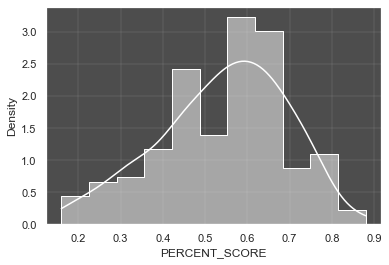

In [9]:
# Starting with histogram
sns.set_theme(style = "darkgrid", rc= {"axes.facecolor": ".3",'grid.linewidth': 0.1, })

sns.histplot(df, x = 'PERCENT_SCORE', color = "WHITE", label = "General Personal Finance", 
             kde = True, element = "step", stat = "density")

Percentage of people getting higher score is more as can be seen by the negatively skewed graph.

<AxesSubplot:>

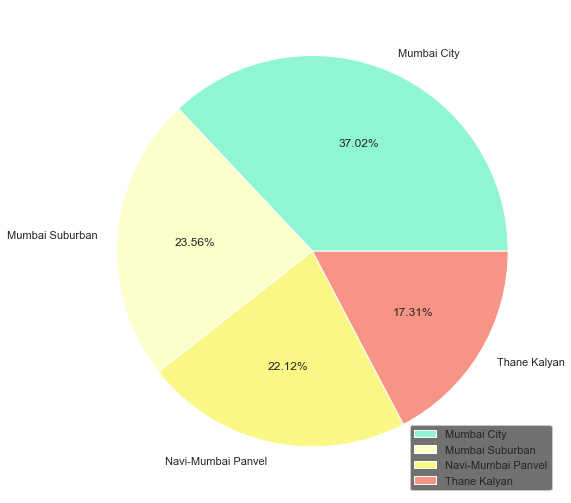

In [10]:
df['DISTRICT'].value_counts().plot(kind = "pie", autopct = "%.2f%%", 
                                   colors = ['#8FF5D2','#FCFFC9','#FAF885','#F79486'],
                                  legend = True,
                                   labels = ["Mumbai City","Mumbai Suburban","Navi-Mumbai Panvel","Thane Kalyan"],
                                   figsize = (10, 9),
                                  ylabel = "")

Highest number of people in the data come belong to Mumbai City followed by Mumbai Surburban, Navi Mumbai-Panvel and Thane-Kalyan

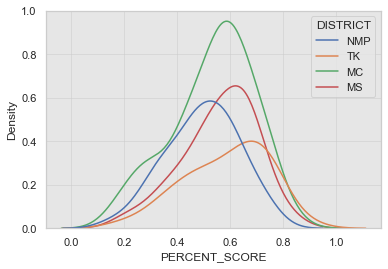

In [11]:
#Percent score across districts
sns.set_theme(style = "whitegrid", rc= {"axes.facecolor": ".9",'grid.linewidth': 0.5, })
sns.kdeplot(data = df, x = 'PERCENT_SCORE', hue = "DISTRICT")
plt.show()

Total scores for Navi-Mumbai-Pune seems to follow normal distribution
The average percent score was highest for Thane-Kalyan was negatively skewed, implying more individuals with higher scores

Text(0.5, 0, 'General Personal Finance')

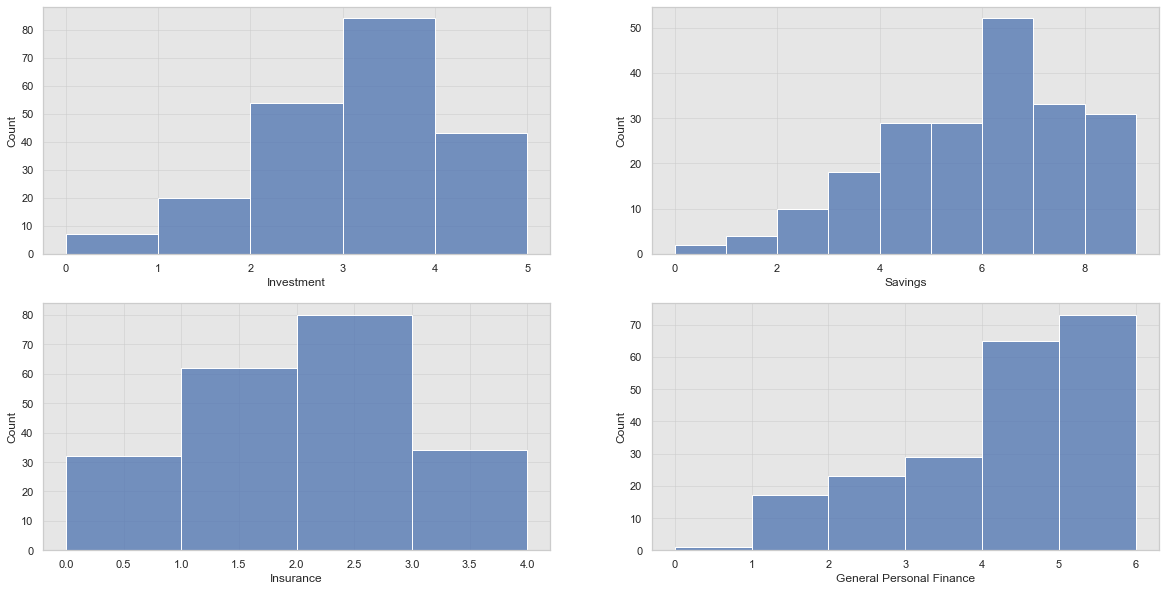

In [12]:
#Histograms of all sections using subplots
plt.figure(figsize = (20,10))

#Investment Score
plt.subplot(2,2,1)
sns.histplot(df['INV_SCORE'], binwidth = 1)
plt.xlabel("Investment")

plt.subplot(2,2,2)
sns.histplot(df['SAV_SCORE'], binwidth = 1)
plt.xlabel("Savings")

plt.subplot(2,2,3)
sns.histplot(df['INSUR_SCORE'], binwidth = 1)
plt.xlabel("Insurance")

plt.subplot(2,2,4)
sns.histplot(df['GEN_PER_FIN_SCORE'], binwidth = 1)
plt.xlabel("General Personal Finance")

General Personal finance score is highly negatively skewed, implying most inviduals scored well in this section. 

<AxesSubplot:xlabel='AGE', ylabel='Density'>

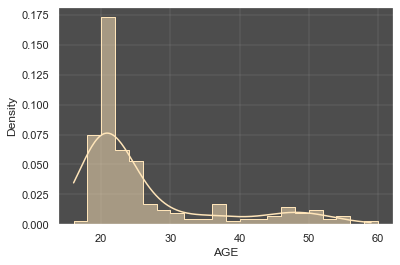

In [13]:
#Histogram of Age
sns.set_theme(style = "darkgrid", rc= {"axes.facecolor": ".3",'grid.linewidth': 0.1})
sns.histplot(df, x = 'AGE', kde = True, color = "#FFE5B9", element = "step", stat = "density",
            binwidth = 2)

Most of the participants were youth who belonged to the early twenties

<AxesSubplot:>

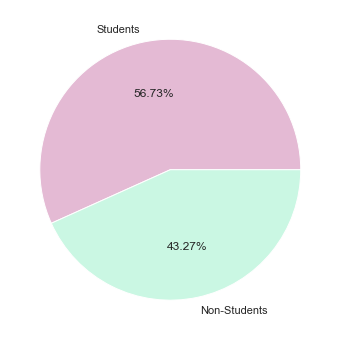

In [14]:
#Checking for Student and Non-Student
#Basic Demographic Checks

df['STU_NON'].value_counts().plot(kind = "pie", ylabel = "", figsize = (6,6), colors = ['#E4BAD4','#CAF7E3'],
                                 labels = ["Students", "Non-Students"], autopct = "%.2f%%")

<AxesSubplot:xlabel='AGE', ylabel='Density'>

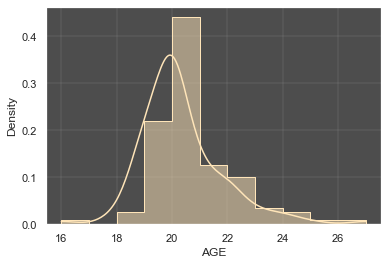

In [15]:
# Sectioning Student Data Set
sdf = df[df['STU_NON'] == "STU"]

#Histogram of students' age
sns.set_theme(style = "darkgrid", rc= {"axes.facecolor": ".3",'grid.linewidth': 0.1})
sns.histplot(sdf, x = 'AGE', kde = True, color = "#FFE5B9", element = "step", binwidth = 1.0, stat = "density")

The distribution of age is slightly negatively skewed 

Text(0.5, 0, 'General Personal Finance')

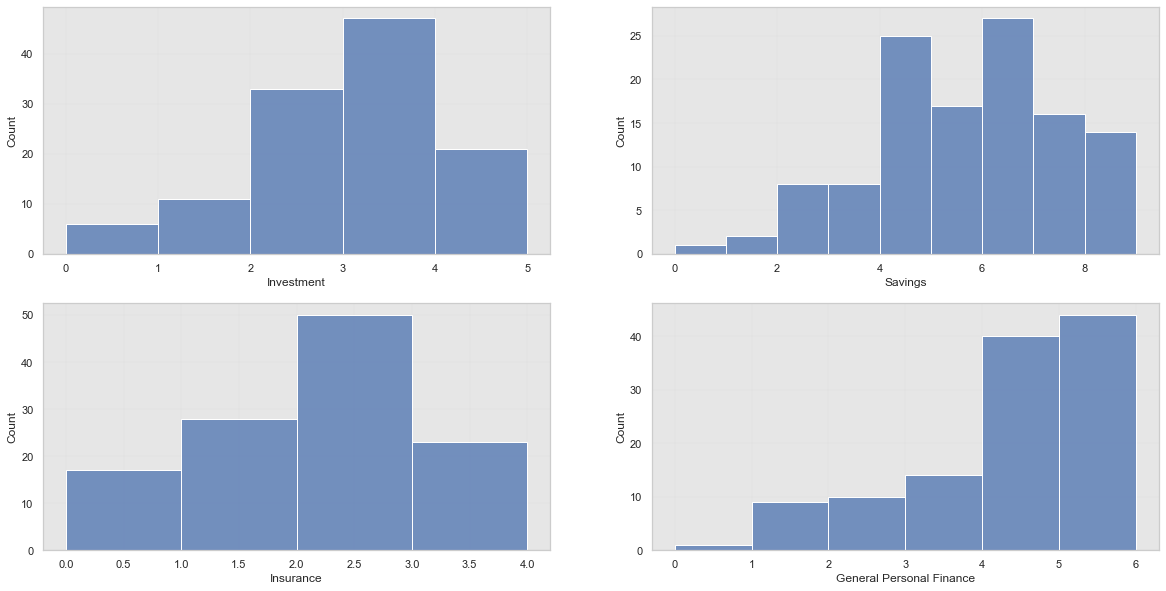

In [16]:
plt.figure(figsize = (20,10))

sns.set_theme(style = "whitegrid", rc= {"axes.facecolor": ".9",'grid.linewidth': 0.1})

plt.subplot(2,2,1)
sns.histplot(sdf['INV_SCORE'], binwidth = 1)
plt.xlabel("Investment")

plt.subplot(2,2,2)
sns.histplot(sdf['SAV_SCORE'], binwidth = 1)
plt.xlabel("Savings")

plt.subplot(2,2,3)
sns.histplot(sdf['INSUR_SCORE'], binwidth = 1)
plt.xlabel("Insurance")

plt.subplot(2,2,4)
sns.histplot(sdf['GEN_PER_FIN_SCORE'], binwidth = 1)
plt.xlabel("General Personal Finance")

The distribution of section scores for students is similar to the overall distribution 

C:\Users\Insha\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Insha\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Insha\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Insha\Anaconda\lib\site-p

<AxesSubplot:xlabel='GUIDANCE', ylabel='count'>

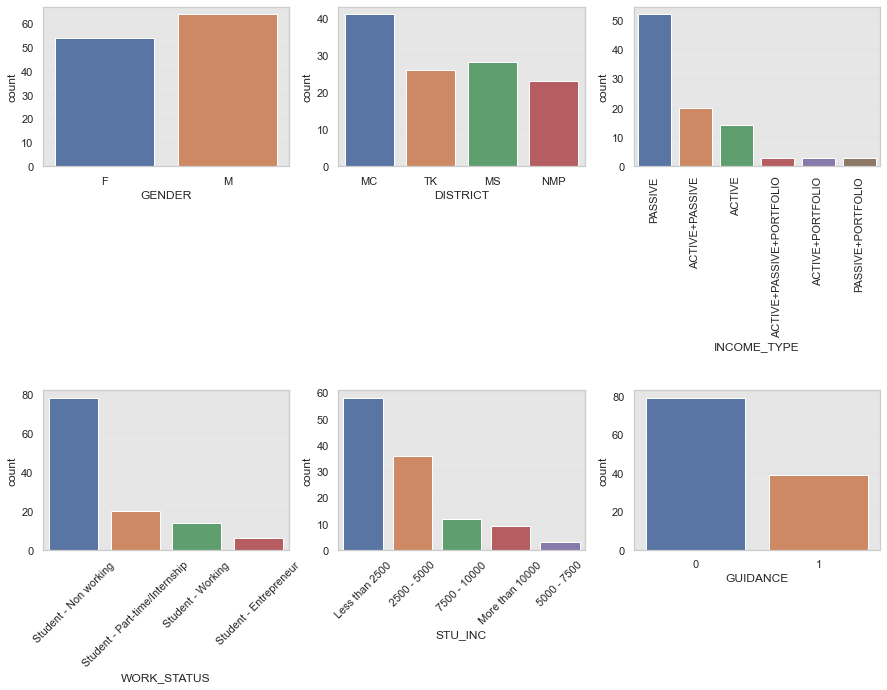

In [17]:
plt.figure(figsize = (15,10))

sns.set_theme(style = "whitegrid", rc= {"axes.facecolor": ".9",'grid.linewidth': 0.1})

plt.subplot(3,3,1)
sns.countplot(sdf['GENDER'])

plt.subplot(3,3,2)
sns.countplot(sdf['DISTRICT'])

plt.subplot(3,3,3)
sns.countplot(sdf['INCOME_TYPE'])
plt.xticks(rotation = 90)

plt.subplot(3,3,7)
sns.countplot(sdf['WORK_STATUS'])
plt.xticks(rotation = 45)

plt.subplot(3,3,8)
sns.countplot(sdf['STU_INC'])
plt.xticks(rotation = 45)

plt.subplot(3,3,9)
sns.countplot(sdf['GUIDANCE'])

Male student participants are more than female participants
Most of the students have passive source of income (pocket money)
Majority of the student population are not working
Most of the Students' income is less than 2500, followed by 2500-5000.
More number of students recieved financial guidance

In [18]:
#Make a new column segregating students into Earners and Non-earners
sdf['STU_EARN_NON'] = np.where(sdf.WORK_STATUS == "Student - Non working", 'Non-earners', "Earners")

sdf.shape

C:\Users\Insha\AppData\Local\Temp\ipykernel_10008\2282466360.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sdf['STU_EARN_NON'] = np.where(sdf.WORK_STATUS == "Student - Non working", 'Non-earners', "Earners")


(118, 26)

Text(0, 0.5, 'Investment Score')

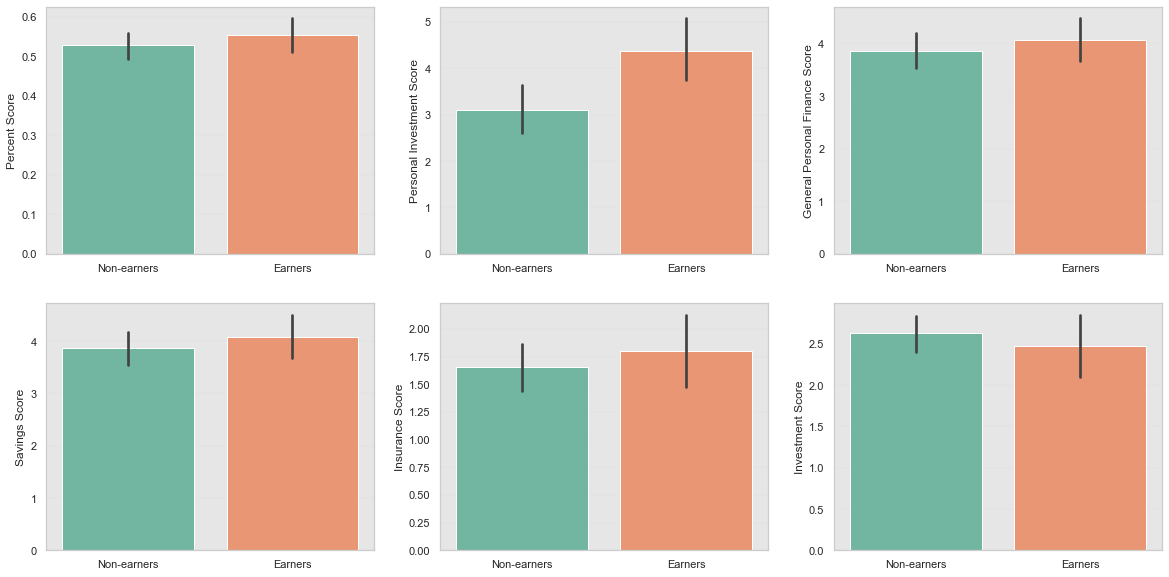

In [19]:
plt.figure(figsize = (20,10))

plt.subplot(2,3,1)
sns.barplot(data = sdf, x = 'STU_EARN_NON', y = 'PERCENT_SCORE', palette = 'Set2')
plt.xlabel("")
plt.ylabel("Percent Score")

plt.subplot(2,3,2)
sns.barplot(data = sdf, x = 'STU_EARN_NON', y = 'PERSONAL_INVESTMENT_SCORE', palette = 'Set2')
plt.xlabel("")
plt.ylabel("Personal Investment Score")

plt.subplot(2,3,3)
sns.barplot(data = sdf, x = 'STU_EARN_NON', y = 'GEN_PER_FIN_SCORE', palette = 'Set2')
plt.xlabel("")
plt.ylabel("General Personal Finance Score")

plt.subplot(2,3,4)
sns.barplot(data = sdf, x = 'STU_EARN_NON', y = 'GEN_PER_FIN_SCORE', palette = 'Set2')
plt.xlabel("")
plt.ylabel("Savings Score")

plt.subplot(2,3,5)
sns.barplot(data = sdf, x = 'STU_EARN_NON', y = 'INSUR_SCORE', palette = 'Set2')
plt.xlabel("")
plt.ylabel("Insurance Score")

plt.subplot(2,3,6)
sns.barplot(data = sdf, x = 'STU_EARN_NON', y = 'INV_SCORE', palette = 'Set2')
plt.xlabel("")
plt.ylabel("Investment Score")

Personal investment score is high for earners than non earners.
There seems to be no significant difference for any other scores.

C:\Users\Insha\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21]),
 [Text(0, 0, 'Pocket Money'),
  Text(1, 0, 'No source of income'),
  Text(2, 0, 'Pocket Money, Internship stipend'),
  Text(3, 0, 'Job Salary (Earned Income)'),
  Text(4, 0, 'Business profits'),
  Text(5, 0, 'Pocket Money, Business profits'),
  Text(6, 0, 'Internship stipend'),
  Text(7, 0, 'Pocket Money, Job Salary (Earned Income)'),
  Text(8, 0, 'Job Salary (Earned Income), Dividend'),
  Text(9, 0, 'Pocket Money, Dividend'),
  Text(10, 0, 'Internship Stipend'),
  Text(11, 0, 'Internship stipend, Dividend'),
  Text(12, 0, 'Job Salary (Earned Income), Business profits'),
  Text(13, 0, 'Dividend, Rental, Capital gains'),
  Text(14, 0, 'Job Salary (Earned Income), Business profits, Dividend, Rental, Capital gains, Royalties or Licensing Incomes'),
  Text(15, 0, 'Pocket Money, No source of income'),
  Text(16, 0, 'Pocket Money, Capital gains'),
  Text(17, 0, 'Internship stipend, Job S

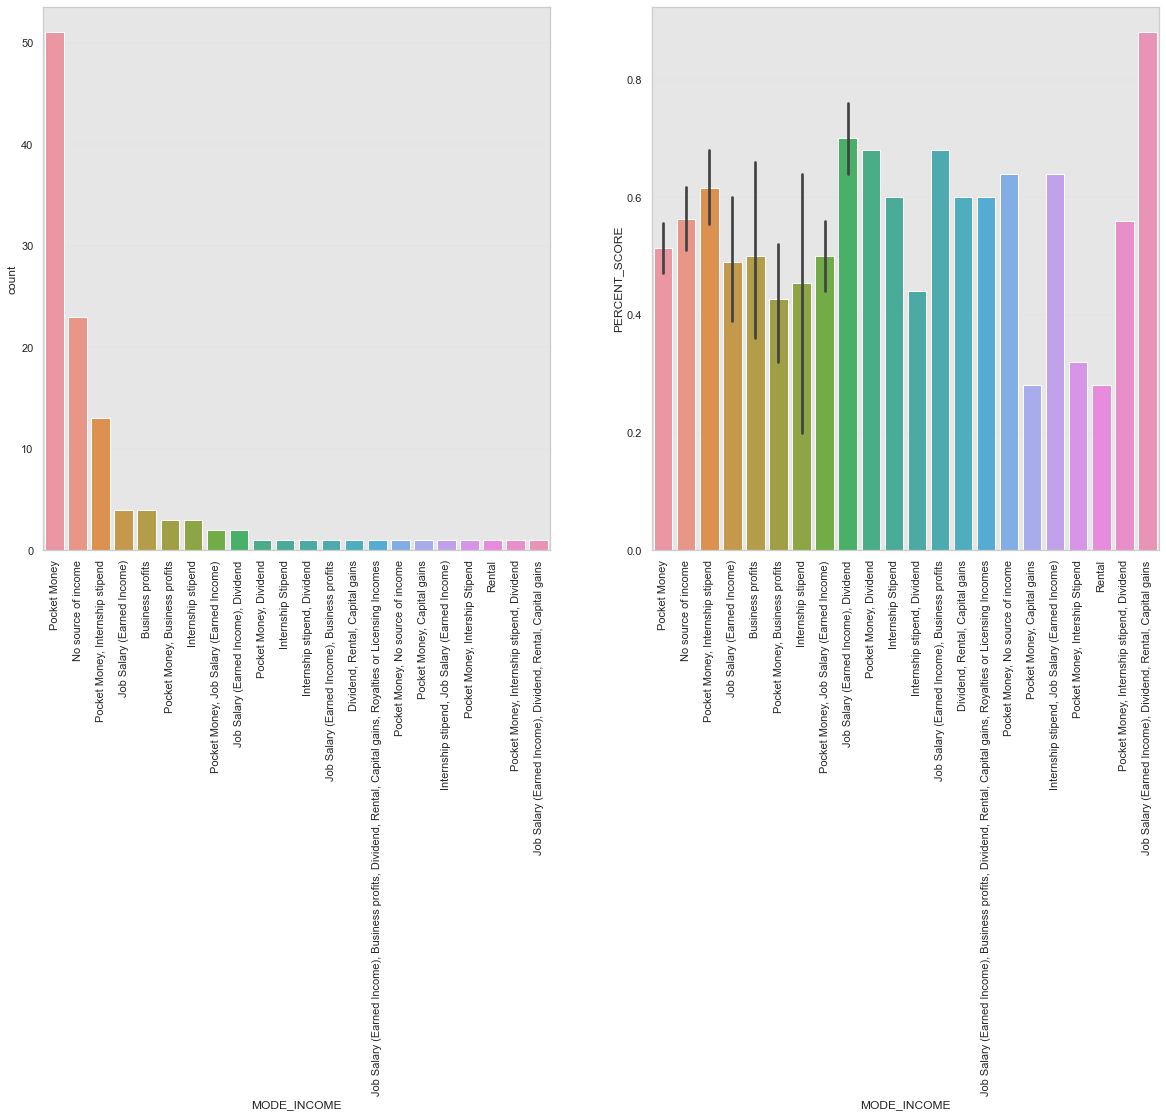

In [20]:
plt.figure(figsize = (20,10))

plt.subplot(1,2,1)
sns.countplot(sdf['MODE_INCOME'], order = sdf['MODE_INCOME'].value_counts().index)
plt.xticks(rotation = 90)

plt.subplot(1,2,2)
sns.barplot(data = sdf, x ='MODE_INCOME', y = 'PERCENT_SCORE', order = sdf['MODE_INCOME'].value_counts().index)
plt.xticks(rotation = 90)

People with diversified modes of income have higher scores 

In [21]:
#Dataframe for working professionals only
workdf = df[((df['WORK_STATUS'] == "Entrepreneur") | 
            (df['WORK_STATUS'] == "Full-time") | 
            (df['WORK_STATUS'] == "Internship") |
            (df['WORK_STATUS'] == "Part-time"))]

In [22]:
#Selecting numerical columns only

numdf = df.loc[:,['AGE','FAMILY_SCORE','PEER_SCORE','PERSONAL_INVESTMENT_SCORE',
                    'GEN_PER_FIN_SCORE','SAV_SCORE','INSUR_SCORE',"INV_SCORE",'PERCENT_SCORE']]

numsdf = sdf.loc[:,['AGE','FAMILY_SCORE','PEER_SCORE','PERSONAL_INVESTMENT_SCORE',
                    'GEN_PER_FIN_SCORE','SAV_SCORE','INSUR_SCORE',"INV_SCORE",'PERCENT_SCORE']]

numworkdf = workdf.loc[:,['AGE','FAMILY_SCORE','PEER_SCORE','PERSONAL_INVESTMENT_SCORE',
                    'GEN_PER_FIN_SCORE','SAV_SCORE','INSUR_SCORE',"INV_SCORE",'PERCENT_SCORE']]

Text(0.5, 1.0, 'Students')

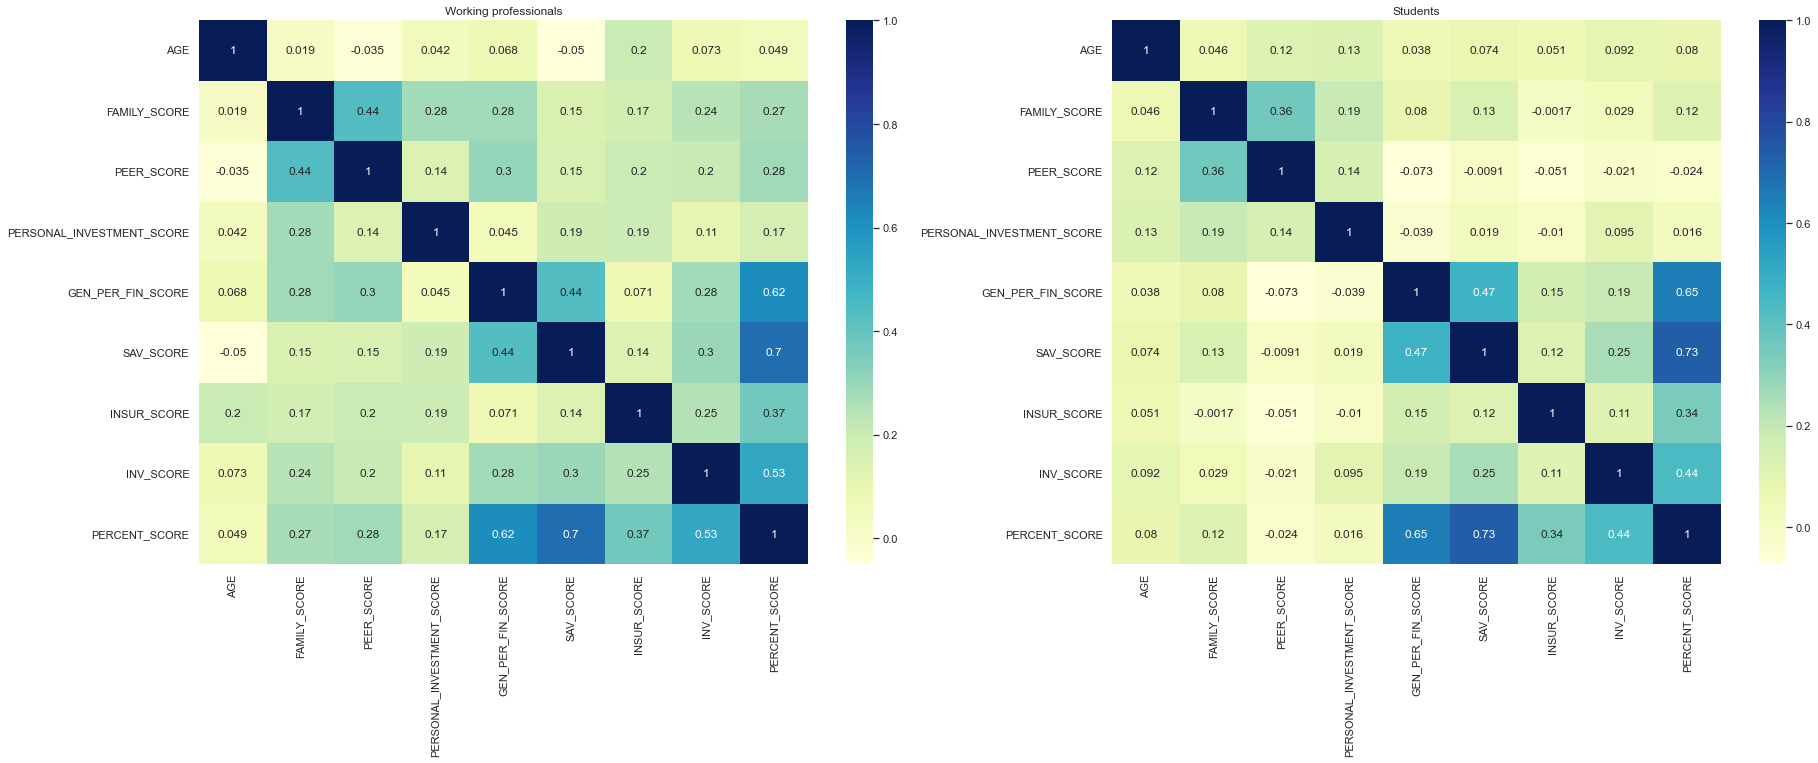

In [64]:
plt.figure(figsize = (30,10))

plt.subplot(1,2,1)
sns.heatmap(numworkdf.corr(method = "kendall"), annot = True, cmap="YlGnBu")
plt.title('Working professionals')

plt.subplot(1,2,2)
sns.heatmap(numsdf.corr(method = "kendall"), annot = True,cmap="YlGnBu")
plt.title("Students")

# TESTING OF HYPOTHESIS

In [24]:
#Tests

#Check for normality of dataset

#D-augustino's test

#Student Data
from scipy.stats import normaltest

# normality test
stat, p = normaltest(sdf['PERCENT_SCORE'])
print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret results
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=4.215, p=0.122
Sample looks Gaussian (fail to reject H0)


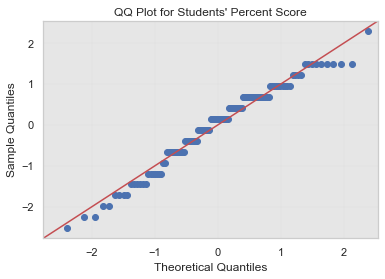

In [25]:
sm.qqplot(sdf['PERCENT_SCORE'], fit = True, line = '45')
plt.title("QQ Plot for Students' Percent Score")
plt.show()

Percent scores for students follow normal distribution

In [26]:
#Work Data
from scipy.stats import normaltest
# normality test
stat, p = normaltest(workdf['PERCENT_SCORE'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret results
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=3.708, p=0.157
Sample looks Gaussian (fail to reject H0)


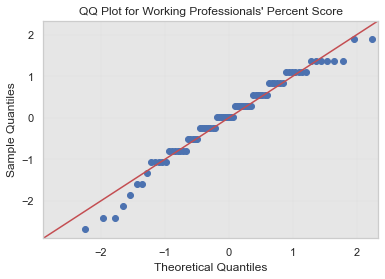

In [27]:
sm.qqplot(workdf['PERCENT_SCORE'], fit = True, line = '45')
plt.title("QQ Plot for Working Professionals' Percent Score")
plt.show()

Percent scores for students follow normal distribution

In [28]:
#Barlett's test

#Percent score between students and working professionals

stats.bartlett(sdf['PERCENT_SCORE'], workdf['PERCENT_SCORE'])

BartlettResult(statistic=0.0002628783417600545, pvalue=0.987064046751404)

Since p-value is greater than 0.05,Variance for percent score for students is equal to that of working professional

In [29]:
stats.ttest_ind(a = sdf['PERCENT_SCORE'],b = workdf['PERCENT_SCORE'])

Ttest_indResult(statistic=-0.9201052701114917, pvalue=0.3586545759752321)

Since p-value is greater than 0.05, mean for percent score for students is equal to that of working professional

In [30]:
#Barlett's test

#Percent score between male and female

femaledf = df[df['GENDER'] == "F"]
maledf = df[df['GENDER'] == "M"]

In [31]:
stats.bartlett(femaledf['PERCENT_SCORE'], maledf['PERCENT_SCORE'])

BartlettResult(statistic=0.0065510420602603635, pvalue=0.935490855539681)

Since p-value is greater than 0.05, variance for percent score for females is equal to that of males

In [32]:
stats.ttest_ind(a = maledf['PERCENT_SCORE'],b = femaledf['PERCENT_SCORE'])

Ttest_indResult(statistic=1.6426360569921032, pvalue=0.10198380443139919)

Since p-value is greater than 0.05, mean for percent score for females is equal to that of males

In [33]:
#Since the scores are on an ordinal scale, non parametric tests will suit best.
#Using Mann-whitney U test to check whether there is any significant difference between the medians of the two groups.
#Personal investment scores between students and working professions.

from scipy.stats import mannwhitneyu

stats.mannwhitneyu(x = sdf['PERSONAL_INVESTMENT_SCORE'], y = workdf['PERSONAL_INVESTMENT_SCORE'])

MannwhitneyuResult(statistic=3375.5, pvalue=0.0009525094012728412)

Since p value is less than 0.05, median for Personal Investment Score is different for that of students and working professionals.

<AxesSubplot:xlabel='PERSONAL_INVESTMENT_SCORE', ylabel='Count'>

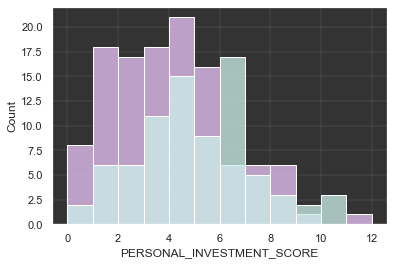

In [52]:
sns.set_theme(style = "darkgrid", rc= {"axes.facecolor": ".2",'grid.linewidth': 0.1})

sns.histplot(sdf['PERSONAL_INVESTMENT_SCORE'], binwidth = 1, color = "#ECC5FB")
sns.histplot(workdf['PERSONAL_INVESTMENT_SCORE'], binwidth = 1, color = "#CDF0EA")

In [34]:
#Personal investment scores between students with high and low family scores.


#Diving the family score of student data into high and low 
#Median of family score is 12.
#Classify it as low if the person if it is less than the median and high is greater than or equal to

sdf['FAM_SCORE_HL'] = np.where(sdf.FAMILY_SCORE >= 12, 'High', "Low")

C:\Users\Insha\AppData\Local\Temp\ipykernel_10008\2516560436.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sdf['FAM_SCORE_HL'] = np.where(sdf.FAMILY_SCORE >= 12, 'High', "Low")


In [40]:
famhighdf = sdf[sdf['FAM_SCORE_HL'] == "High"]
famlowdf = sdf[sdf['FAM_SCORE_HL'] == "Low"]

In [62]:
stats.mannwhitneyu(x = famhighdf['PERSONAL_INVESTMENT_SCORE'], y = famlowdf['PERSONAL_INVESTMENT_SCORE'], alternative = 'greater')

MannwhitneyuResult(statistic=2270.0, pvalue=0.0012269544833100423)

Since p value is less than 0.05, median for Personal Investment Score is greater for that of students who talk to their family more about finance as opposed to those who do less.

<AxesSubplot:xlabel='PERSONAL_INVESTMENT_SCORE', ylabel='Count'>

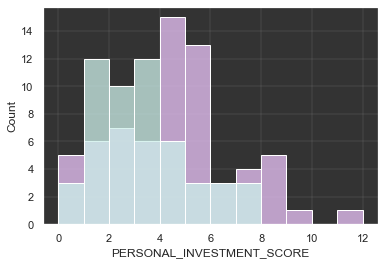

In [58]:
sns.set_theme(style = "darkgrid", rc= {"axes.facecolor": ".2",'grid.linewidth': 0.1})

sns.histplot(famhighdf['PERSONAL_INVESTMENT_SCORE'], binwidth = 1, color = "#ECC5FB")
sns.histplot(famlowdf['PERSONAL_INVESTMENT_SCORE'], binwidth = 1, color = "#CDF0EA")

In [67]:
#Kendall's Correlation test

#Family score and percent score

stats.kendalltau(df.FAMILY_SCORE, df.PERCENT_SCORE)

KendalltauResult(correlation=0.18627713659970888, pvalue=0.0001559649067280325)

Since p value is less than 0.05, conclude that the variables are positively correlated.

In [68]:
#Peer score and Percent Score

stats.kendalltau(df.PEER_SCORE, df.PERCENT_SCORE)

KendalltauResult(correlation=0.1036167969803017, pvalue=0.03660098454417329)

Since p value is less than 0.05, conclude that the variables are positively correlated.

In [72]:
#Peer Score and Family Score

stats.kendalltau(df.PEER_SCORE, df.FAMILY_SCORE)

KendalltauResult(correlation=0.3746564338967189, pvalue=1.7171730992899875e-14)

Since p value is less than 0.05, conclude that the variables are positively correlated.

<AxesSubplot:xlabel='DISTRICT', ylabel='PERCENT_SCORE'>

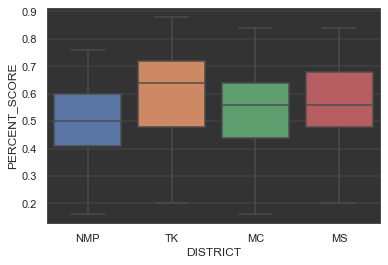

In [80]:
#Kruskal-Wallis Test
#District wise percent score comparison
sns.boxplot(data=df, x="DISTRICT", y="PERCENT_SCORE")

In [85]:
nmpdf = df[df['DISTRICT'] == "NMP"]
tkdf = df[df['DISTRICT'] == "TK"]
mcdf = df[df['DISTRICT'] == "MC"]
msdf = df[df['DISTRICT'] == "MS"]
stats.kruskal(nmpdf['PERCENT_SCORE'], tkdf['PERCENT_SCORE'], mcdf['PERCENT_SCORE'], msdf['PERCENT_SCORE'])

KruskalResult(statistic=9.539744998549656, pvalue=0.0229122778248291)

Atleast one of the medians is different